# Import

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting the result path files

In [8]:
path = '/home/id357/Downloads/experiments/queries-short/output/combination_0/query-times.csv'
paths = {
    'ldp-filtered-type-index': "/home/id357/Downloads/experiments/queries-short/output/combination_0/query-times.csv",
    'ldp-shape-index-type-index':"/home/id357/Downloads/experiments/queries-short/output/combination_1/query-times.csv",
    "ldp-shape-index":"/home/id357/Downloads/experiments/queries-short/output/combination_2/query-times.csv",
    "shape-index":"/home/id357/Downloads/experiments/queries-short/output/combination_3/query-times.csv"
}
df = pd.read_csv(path,sep=";")

In [15]:
df.loc[df['error'] == True, ['time','results', 'httpRequests']] = float('nan')
df

,name,id,results,time,error,timestamps,httpRequests
0,interactive-short-1,0,1.0,727.0,False,713,97.0
1,interactive-short-1,1,1.0,447.0,False,446,56.0
2,interactive-short-1,2,1.0,325.0,False,324,49.0
3,interactive-short-1,3,1.0,295.0,False,293,36.0
4,interactive-short-1,4,1.0,420.0,False,420,51.0
5,interactive-short-2,0,10.0,3212.0,False,2998 3110 3112 3112 3112 3138 3140 3140 3140 3212,6.0
6,interactive-short-2,1,0.0,81.0,False,NaN,6.0
7,interactive-short-2,2,0.0,70.0,False,NaN,6.0
8,interactive-short-2,3,0.0,56.0,False,NaN,6.0
9,interactive-short-2,4,10.0,2210.0,False,2157 2159 2159 2159 2183 2184 2184 2184 2208 2210,6.0


# Helper function

In [16]:
def generate(path, query):
    df = pd.read_csv(path,sep=";")
    df.loc[df['error'] == True, ['time','results', 'httpRequests']] = float('nan')
    df.sort_values(by=['name'], axis=0, inplace=True)
    # set the index to be this and don't drop
    df.set_index(keys=['name'], drop=False,inplace=True)
    # get a list of names
    names=df['name'].unique().tolist()
    
    # now we can perform a lookup on a 'view' of the dataframe
    df_query = df.loc[df.name==query]
    return df_query

In [17]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
def plotComparif(data, col, queries):
    index = np.arange(5)
    
    bar_width = 0.21
    fig, ax = plt.subplots(layout='constrained')
    i = 0
    
    for key, datasets in data.items():
        offset = bar_width * i
        df = datasets[queries]
        y = df[col].to_numpy()
        rects = ax.bar(index+ offset, y, bar_width, label=key)        
        i+=1

    
    ax.set_xlabel('id')
    ax.set_ylabel(col)
    ax.set_title("{} ; {}".format(queries, col))
    ax.set_xticks(index + bar_width, index)
    ax.set_ylim(bottom=0)
    ax.legend()
    
    plt.show()

# Divide the dataset by queries and reachability criteria

In [18]:
dataFrame = {}
nVariation = 7
for key,path in paths.items():
    dataFrame[key] = {}
    for i in range(nVariation+1): 
        queries = "interactive-short-{}".format(i+1)
        dataFrame[key][queries] = generate(path, queries)

# Plot each queries

## interactive-short-1

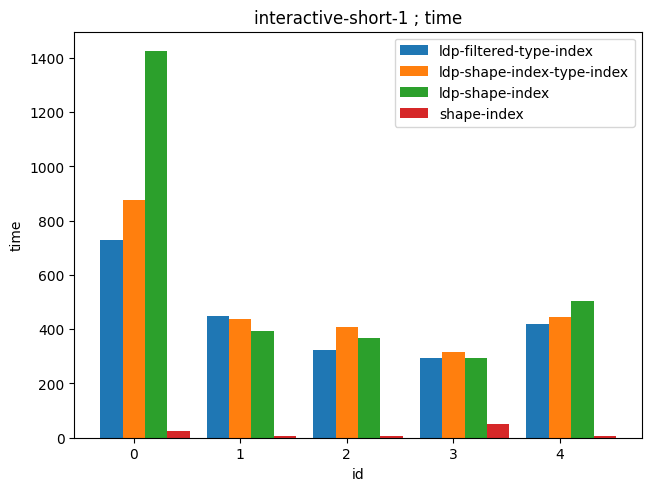

In [19]:
plotComparif(dataFrame, 'time', 'interactive-short-1')

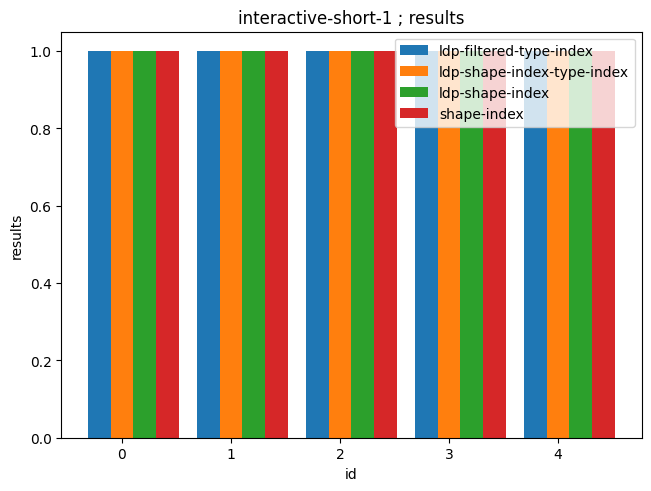

In [20]:
plotComparif(dataFrame, 'results', 'interactive-short-1')

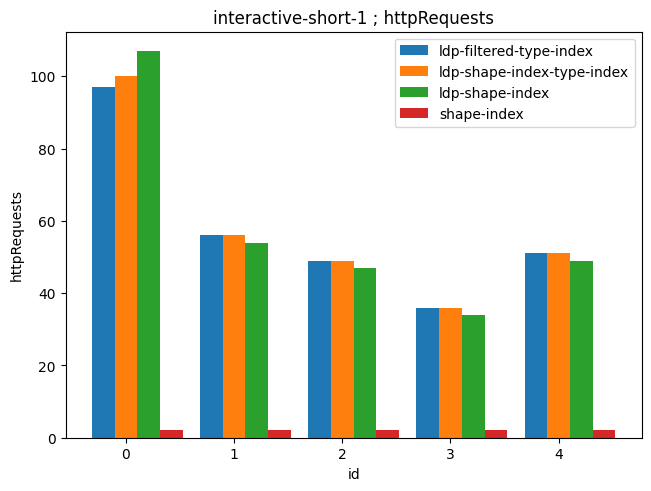

In [21]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-1')

## interactive-short-2

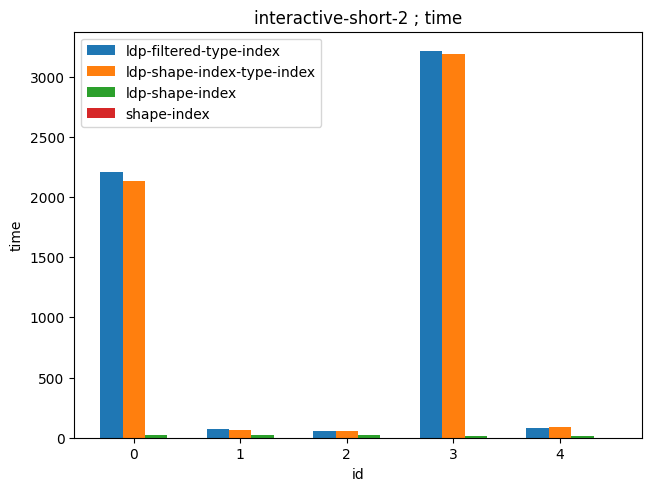

In [22]:
plotComparif(dataFrame, 'time', 'interactive-short-2')

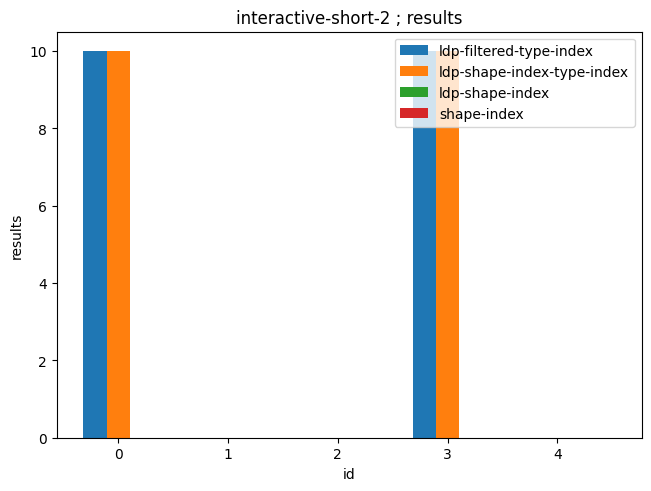

In [23]:
plotComparif(dataFrame, 'results', 'interactive-short-2')

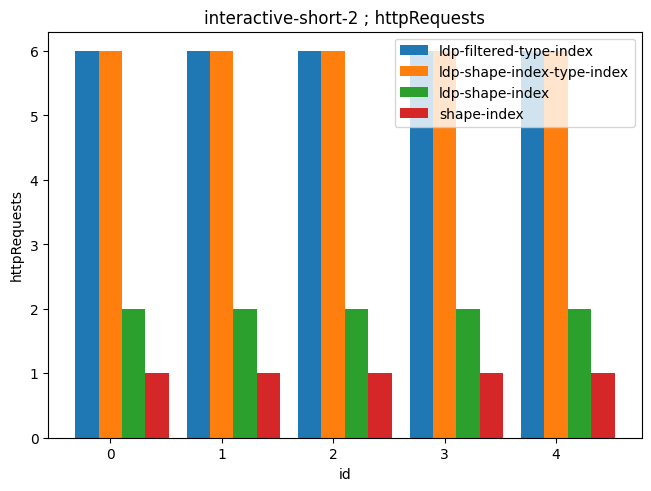

In [24]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-2')

## interactive-short-3

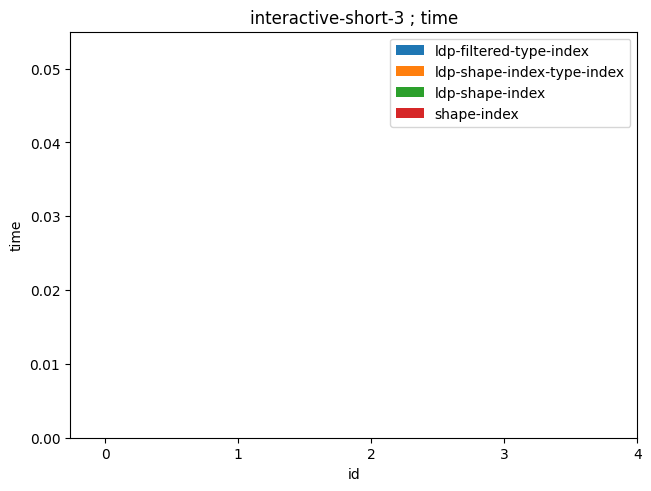

In [25]:
plotComparif(dataFrame, 'time', 'interactive-short-3')

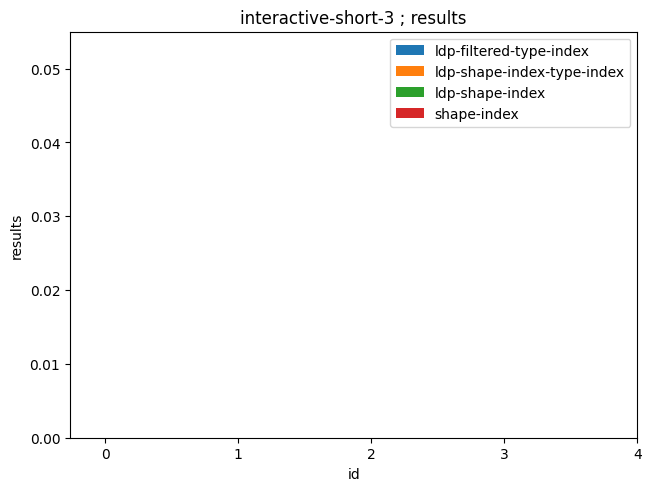

In [26]:
plotComparif(dataFrame, 'results', 'interactive-short-3')

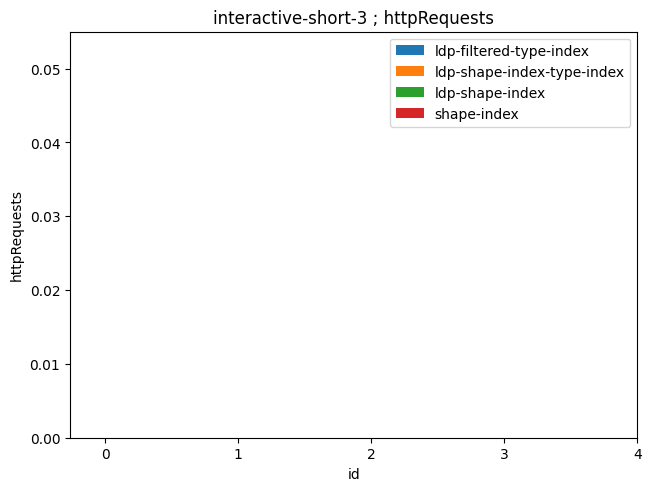

In [27]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-3')

## interactive-short-4

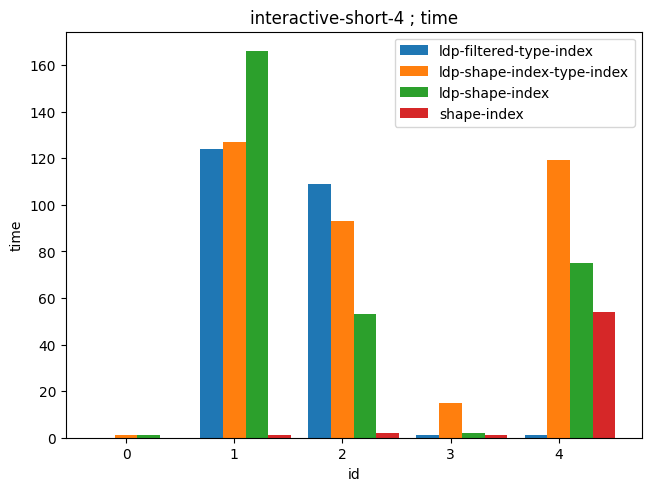

In [28]:
plotComparif(dataFrame, 'time', 'interactive-short-4')

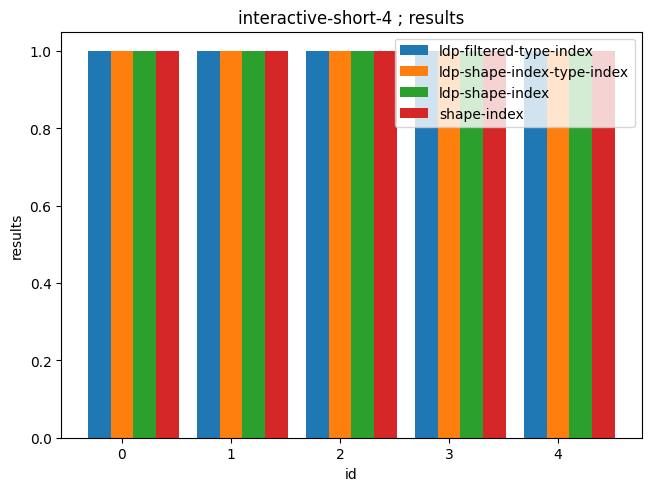

In [29]:
plotComparif(dataFrame, 'results', 'interactive-short-4')

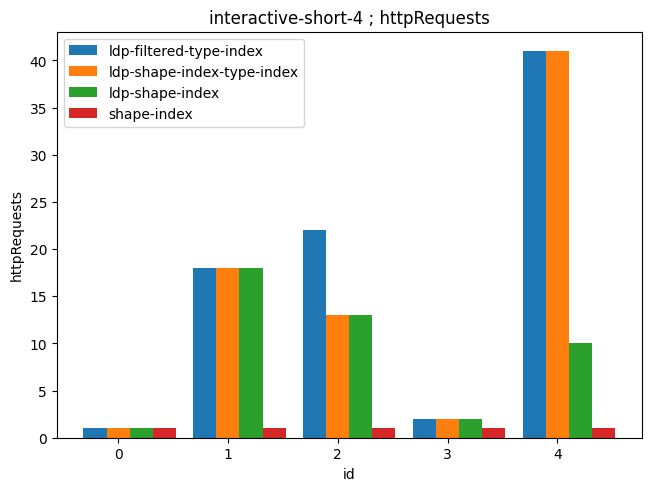

In [30]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-4')

## interactive-short-5

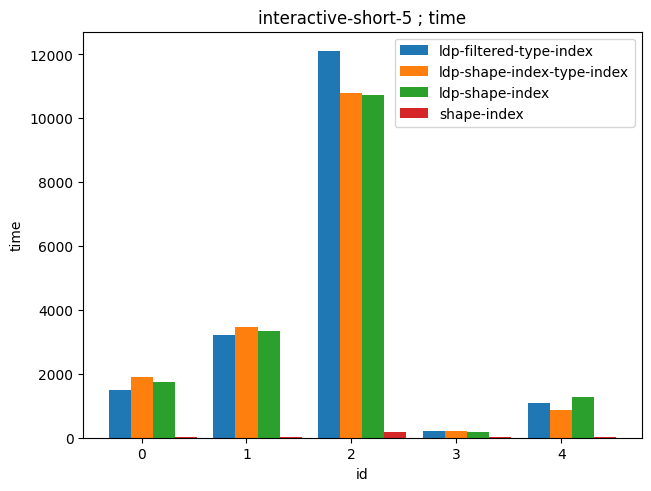

In [31]:
plotComparif(dataFrame, 'time', 'interactive-short-5')

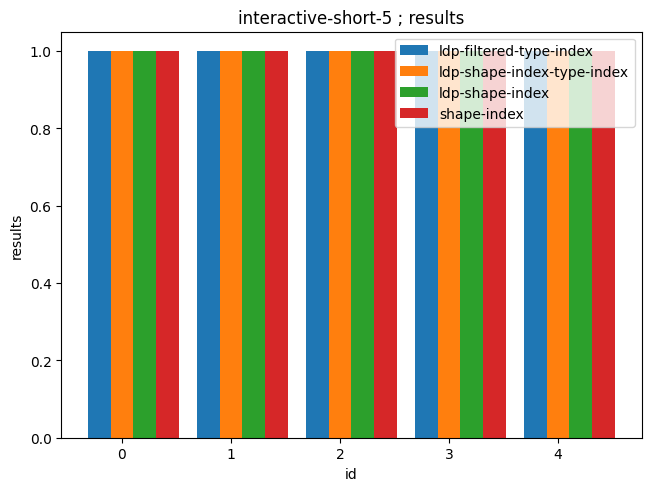

In [32]:
plotComparif(dataFrame, 'results', 'interactive-short-5')

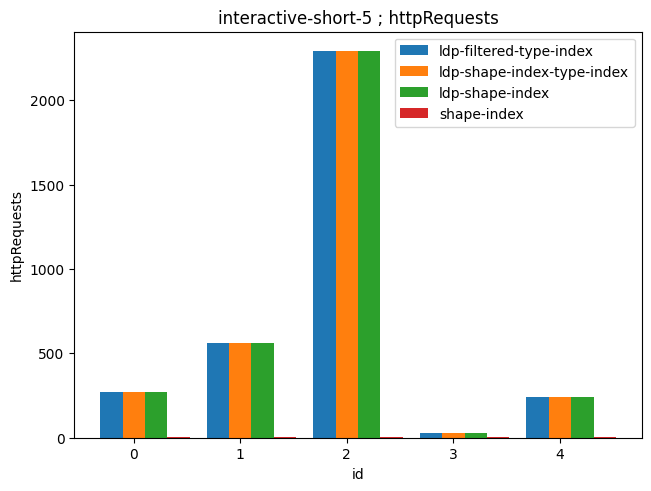

In [33]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-5')

## interactive-short-6

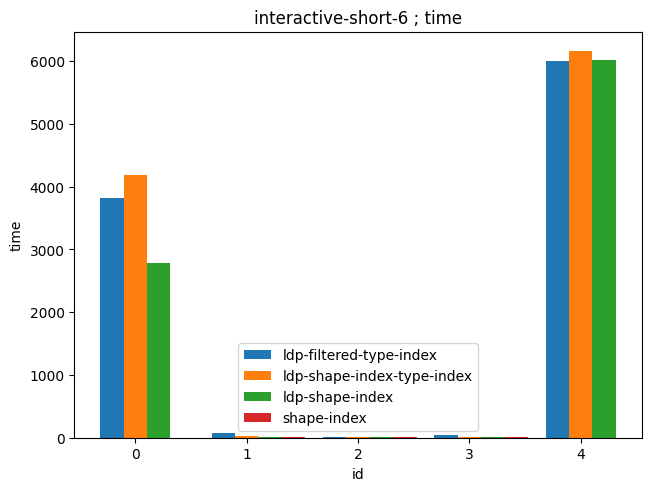

In [34]:
plotComparif(dataFrame, 'time', 'interactive-short-6')

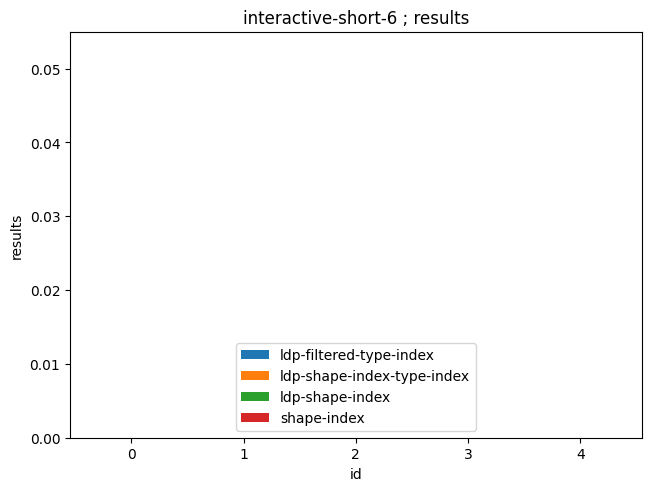

In [35]:
plotComparif(dataFrame, 'results', 'interactive-short-6')

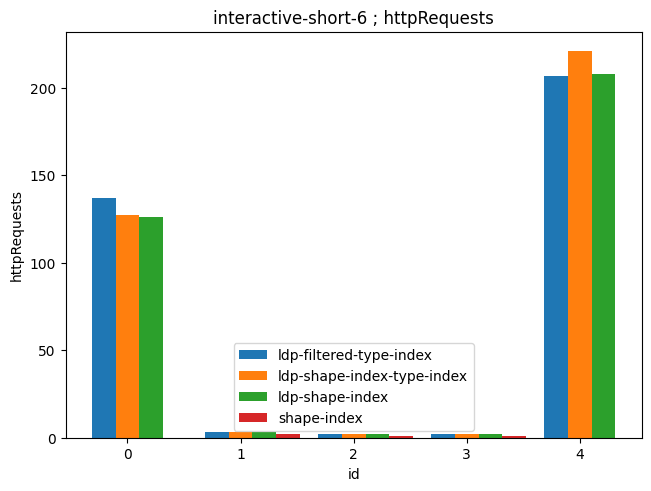

In [36]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-6')

## interactive-short-7

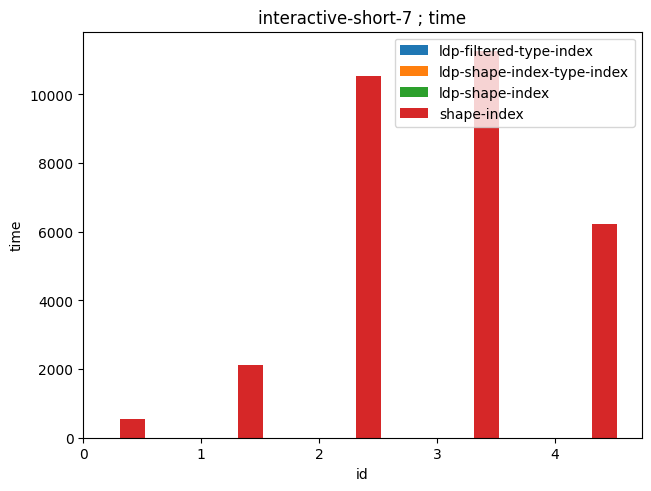

In [37]:
plotComparif(dataFrame, 'time', 'interactive-short-7')

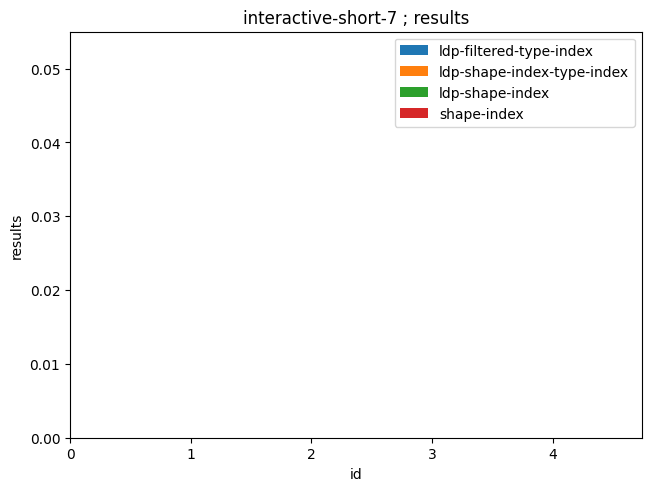

In [38]:
plotComparif(dataFrame, 'results', 'interactive-short-7')

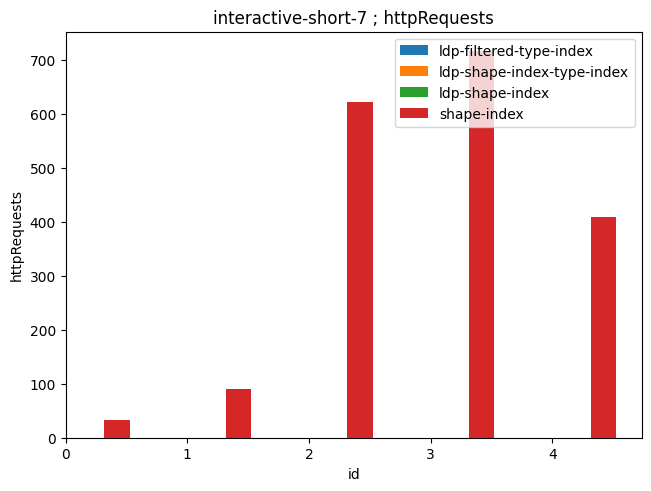

In [39]:
plotComparif(dataFrame, 'httpRequests', 'interactive-short-7')